### About 

Download data in form of tables insde PDFs and fetch data from PDFs from the following web portal:
* https://www.oldenburg.de/startseite/politik/verwaltung/statistik/statistische-daten-online/inhaltsverzeichnis.html 

### Dependenices

* See ```requirements.txt``` file

In [1]:
%matplotlib inline

import os
import tabula
import requests
import pandas as pd
import urllib.parse as urlparse

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

# global IPython settings
plt.style.use('ggplot')

#np.set_printoptions(precision=3)
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

# plt
rcParams['figure.figsize'] = 25, 12

# disabling some warnings
pd.options.mode.chained_assignment = None  # default='warn'

### Download PDF File

In [3]:
def download(url, force_download=False):
    """ Downloads given URL and saves a local file"""
    
    PDFS_DIR = 'PDFs'
    if not os.path.exists(PDFS_DIR):
        print('[i] create following folder: {0}'.format(PDFS_DIR))
        os.makedirs(PDFS_DIR)
            
    r = requests.get(url, stream=True)
    _urlparse = urlparse.urlparse(url)
    f_name = os.path.join(PDFS_DIR, os.path.basename(_urlparse.path))
    if (not os.path.exists(f_name) or force_download):
        print('[i] start download for of the url: {}'.format(url))
        print('[i] target file: {}'.format(f_name))
        with open(f_name, 'wb') as fd:
            for chunk in r.iter_content(chunk_size=1024):
                fd.write(chunk)
        print('[i] finish download')
        
    return f_name 

In [4]:
# 0313 – Lohn- und Einkommensteuer 2010 – Gesamtbetrag der Einkünfte
url_people_income = 'https://www.oldenburg.de/fileadmin/oldenburg/Benutzer/PDF/40/402/0313-0313-1-2016-Internet.pdf'
pdf_people_income = download(url_people_income, True)

# 0302-3 – Sozialversicherungspflichtig Beschäftigte am Arbeitsort nach Altersgruppen 2010 bis 2016
url_people_employment = 'https://www.oldenburg.de/fileadmin/oldenburg/Benutzer/PDF/40/402/0302-2-0302-3-2016-Internet.pdf'
pdf_people_employment = download(url_people_employment, True)

[i] start download for of the url: https://www.oldenburg.de/fileadmin/oldenburg/Benutzer/PDF/40/402/0313-0313-1-2016-Internet.pdf
[i] target file: PDFs\0313-0313-1-2016-Internet.pdf
[i] finish download
[i] start download for of the url: https://www.oldenburg.de/fileadmin/oldenburg/Benutzer/PDF/40/402/0302-2-0302-3-2016-Internet.pdf
[i] target file: PDFs\0302-2-0302-3-2016-Internet.pdf
[i] finish download


### Convert PDF into DataFrame

In [50]:
# read pdf into DataFrame
# for German langauge use following encoding = 'cp1252')
df_employment = tabula.read_pdf(pdf_people_employment, encoding = 'cp1252')
df_employment

,Unnamed: 0,Unnamed: 1,Bis mittlere Reife,Abitur,Unnamed: 4,Höhere,Universität,Unnamed: 7
0,Altersgruppen der,NaN,ohne mit,ohne mit,NaN,Fach-,oder,ohne
1,Beschäftigten,insgesamt,NaN,NaN,NaN,schule/ Fachhoch-,entspr.,Angaben
2,NaN,NaN,Berufsausbildung,Berufsausbildung,NaN,schule,Akademie,NaN
3,S 1,S 2,S 3 S 4,S 5 S 6,NaN,S 7,S 8,S 9
4,insgesamt,13.750,890 6.093,534 820,NaN,381,1.790,3.242
5,unter 20 Jahre,73,24 7,12 -,NaN,•,-,29
6,20 bis unter 25 Jahre,684,67 191,163 12,NaN,5,45,201
7,25 bis unter 30 Jahre,1.362,64 387,169 56,NaN,22,348,316
8,30 bis unter 35 Jahre,1.335,63 458,83 90,NaN,39,278,324
9,35 bis unter 40 Jahre,1.361,63 551,38 107,NaN,47,215,340


In [51]:
# load and parse PDF
df_employment = tabula.read_pdf(pdf_people_employment, encoding = 'cp1252')

# identify row index
TBL_START_ROW = 3
TBL_LAST_ROW = 16
index = [x for x in range(TBL_START_ROW, TBL_LAST_ROW)]
print(index)
df_pdf = df_employment.iloc[index,:]

# rename columns
df_pdf.columns = ['col_{0}'.format(x+1) for x in range(len(df_pdf.columns))]
df_pdf

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8
3,S 1,S 2,S 3 S 4,S 5 S 6,NaN,S 7,S 8,S 9
4,insgesamt,13.750,890 6.093,534 820,NaN,381,1.790,3.242
5,unter 20 Jahre,73,24 7,12 -,NaN,•,-,29
6,20 bis unter 25 Jahre,684,67 191,163 12,NaN,5,45,201
7,25 bis unter 30 Jahre,1.362,64 387,169 56,NaN,22,348,316
8,30 bis unter 35 Jahre,1.335,63 458,83 90,NaN,39,278,324
9,35 bis unter 40 Jahre,1.361,63 551,38 107,NaN,47,215,340
10,40 bis unter 45 Jahre,2.028,80 1.005,24 156,NaN,63,210,490
11,45 bis unter 50 Jahre,2.298,131 1.104,25 194,NaN,76,242,526
12,50 bis unter 55 Jahre,1.987,137 978,10 118,NaN,59,205,480


### Split "Glued" Together Columns

In [53]:
df_pdf_tmp = df_pdf
df_pdf_tmp['col_3_1'], df_pdf_tmp['col_3_2'] = df_pdf_tmp['col_3'].str.split(' ', 1).str
df_pdf_tmp['col_4_1'], df_pdf_tmp['col_4_2'] = df_pdf_tmp['col_4'].str.split(' ', 1).str
df_pdf_tmp = df_pdf_tmp.reset_index()
df_pdf_tmp

,index,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_3_1,col_3_2,col_4_1,col_4_2
0,3,S 1,S 2,S 3 S 4,S 5 S 6,NaN,S 7,S 8,S 9,S,3 S 4,S,5 S 6
1,4,insgesamt,13.750,890 6.093,534 820,NaN,381,1.790,3.242,890,6.093,534,820
2,5,unter 20 Jahre,73,24 7,12 -,NaN,•,-,29,24,7,12,-
3,6,20 bis unter 25 Jahre,684,67 191,163 12,NaN,5,45,201,67,191,163,12
4,7,25 bis unter 30 Jahre,1.362,64 387,169 56,NaN,22,348,316,64,387,169,56
5,8,30 bis unter 35 Jahre,1.335,63 458,83 90,NaN,39,278,324,63,458,83,90
6,9,35 bis unter 40 Jahre,1.361,63 551,38 107,NaN,47,215,340,63,551,38,107
7,10,40 bis unter 45 Jahre,2.028,80 1.005,24 156,NaN,63,210,490,80,1.005,24,156
8,11,45 bis unter 50 Jahre,2.298,131 1.104,25 194,NaN,76,242,526,131,1.104,25,194
9,12,50 bis unter 55 Jahre,1.987,137 978,10 118,NaN,59,205,480,137,978,10,118


In [54]:
def custom_replace(df, column):
    df[column] = df[column].astype(str)   # <- to let conversion to srt happen
    df[column] = df[column].apply(lambda x: x.replace('NaN', '0'))
    df[column] = df[column].apply(lambda x: x.replace('-', '0'))
    df[column] = df[column].apply(lambda x: x.replace('•', '0'))
    df[column] = df[column].apply(lambda x: x.replace('.', ''))
    #f[column] = df[column].apply(lambda x: x.replace(',', '.'))
    df[column] = df[column].astype(float) # <- to let conversion happen once

index = [x+1 for x in range(len(df_pdf_tmp)-1)]
print(index)
df_pdf_tmp_v2 = df_pdf_tmp.iloc[index,:]
#df_pdf_tmp_v2
target_columns = ['col_2', 'col_6', 'col_7', 'col_8', 'col_3_1', 'col_3_2', 'col_4_1', 'col_4_2']
#df_pdf_tmp_v2[target_columns]
df_target = df_pdf_tmp_v2[target_columns]

# clean/cast
for col in target_columns:
    print ('Replacing values in column: {}'.format(col))
    custom_replace(df_target, col)
    
df_target = df_target[1:] # remove the first row with total sum
df_pdf_tbl1 = df_target
df_pdf_tbl1

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Replacing values in column: col_2
Replacing values in column: col_6
Replacing values in column: col_7
Replacing values in column: col_8
Replacing values in column: col_3_1
Replacing values in column: col_3_2
Replacing values in column: col_4_1
Replacing values in column: col_4_2


,col_2,col_6,col_7,col_8,col_3_1,col_3_2,col_4_1,col_4_2
2,73.0,0.0,0.0,29.0,24.0,7.0,12.0,0.0
3,684.0,5.0,45.0,201.0,67.0,191.0,163.0,12.0
4,1362.0,22.0,348.0,316.0,64.0,387.0,169.0,56.0
5,1335.0,39.0,278.0,324.0,63.0,458.0,83.0,90.0
6,1361.0,47.0,215.0,340.0,63.0,551.0,38.0,107.0
7,2028.0,63.0,210.0,490.0,80.0,1005.0,24.0,156.0
8,2298.0,76.0,242.0,526.0,131.0,1104.0,25.0,194.0
9,1987.0,59.0,205.0,480.0,137.0,978.0,10.0,118.0
10,1548.0,39.0,153.0,304.0,142.0,840.0,8.0,62.0
11,925.0,30.0,79.0,164.0,102.0,528.0,0.0,20.0


#### Gat the meaningful names back to the DF

In [55]:
df_pdf_tbl1['groups'] = df_pdf_tmp['col_1']
df_pdf_tbl1

,col_2,col_6,col_7,col_8,col_3_1,col_3_2,col_4_1,col_4_2,groups
2,73.0,0.0,0.0,29.0,24.0,7.0,12.0,0.0,unter 20 Jahre
3,684.0,5.0,45.0,201.0,67.0,191.0,163.0,12.0,20 bis unter 25 Jahre
4,1362.0,22.0,348.0,316.0,64.0,387.0,169.0,56.0,25 bis unter 30 Jahre
5,1335.0,39.0,278.0,324.0,63.0,458.0,83.0,90.0,30 bis unter 35 Jahre
6,1361.0,47.0,215.0,340.0,63.0,551.0,38.0,107.0,35 bis unter 40 Jahre
7,2028.0,63.0,210.0,490.0,80.0,1005.0,24.0,156.0,40 bis unter 45 Jahre
8,2298.0,76.0,242.0,526.0,131.0,1104.0,25.0,194.0,45 bis unter 50 Jahre
9,1987.0,59.0,205.0,480.0,137.0,978.0,10.0,118.0,50 bis unter 55 Jahre
10,1548.0,39.0,153.0,304.0,142.0,840.0,8.0,62.0,55 bis unter 60 Jahre
11,925.0,30.0,79.0,164.0,102.0,528.0,0.0,20.0,60 bis unter 65 Jahre


##### Rename the fist column only

In [56]:
df_pdf_tbl1.columns

Index(['col_2', 'col_6', 'col_7', 'col_8', 'col_3_1', 'col_3_2', 'col_4_1',
       'col_4_2', 'groups'],
      dtype='object')

In [57]:
df_pdf_tbl1.columns = ['insgesamt', 'col_6', 'col_7', 'col_8', 'col_3_1', 'col_3_2', 'col_4_1', 'col_4_2', 'groups']

In [59]:
print ('Sum: {0}'.format(df_pdf_tbl1['insgesamt'].sum()))
the_same = (df_pdf_tbl1['insgesamt'].sum() == 13750)
print ('Parsed equals to original sum: {0}'.format(the_same))

Sum: 13750.0
Parsed equals to original sum: True


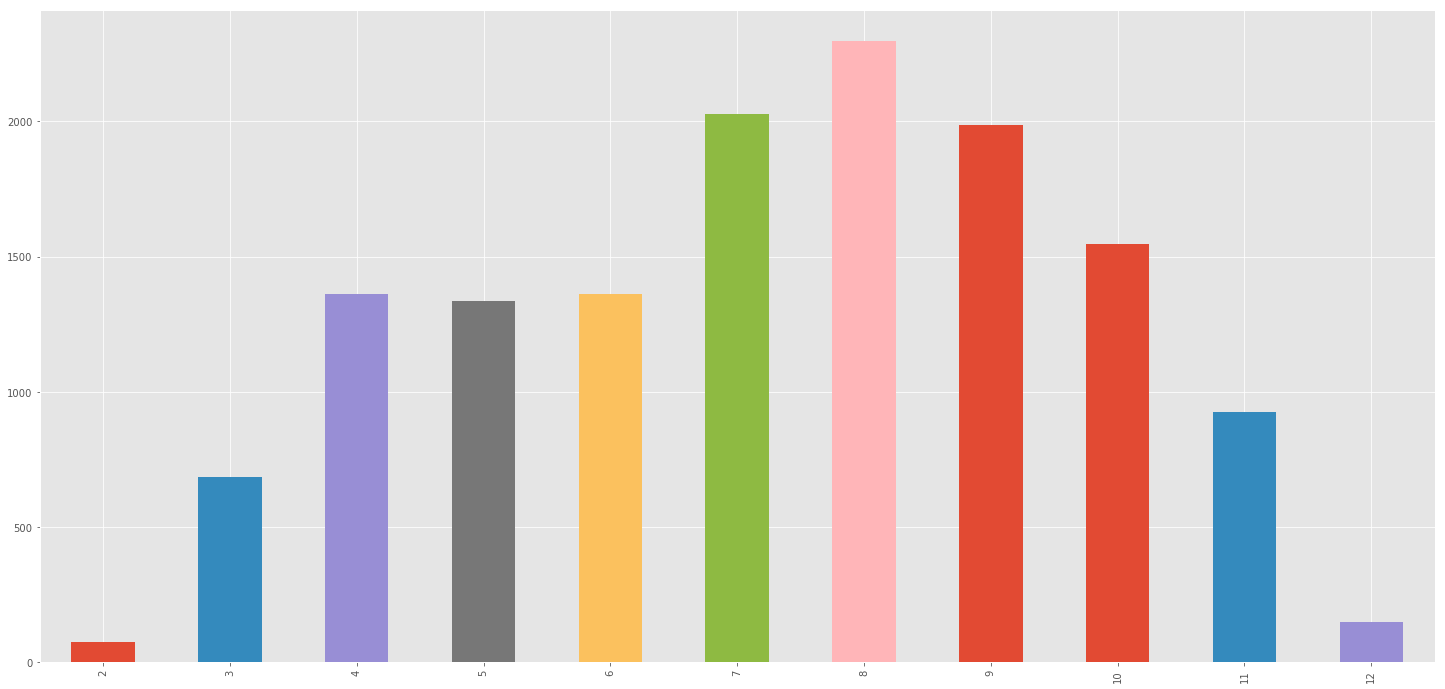

In [60]:
df_pdf_tbl1['insgesamt'].plot(kind='bar')

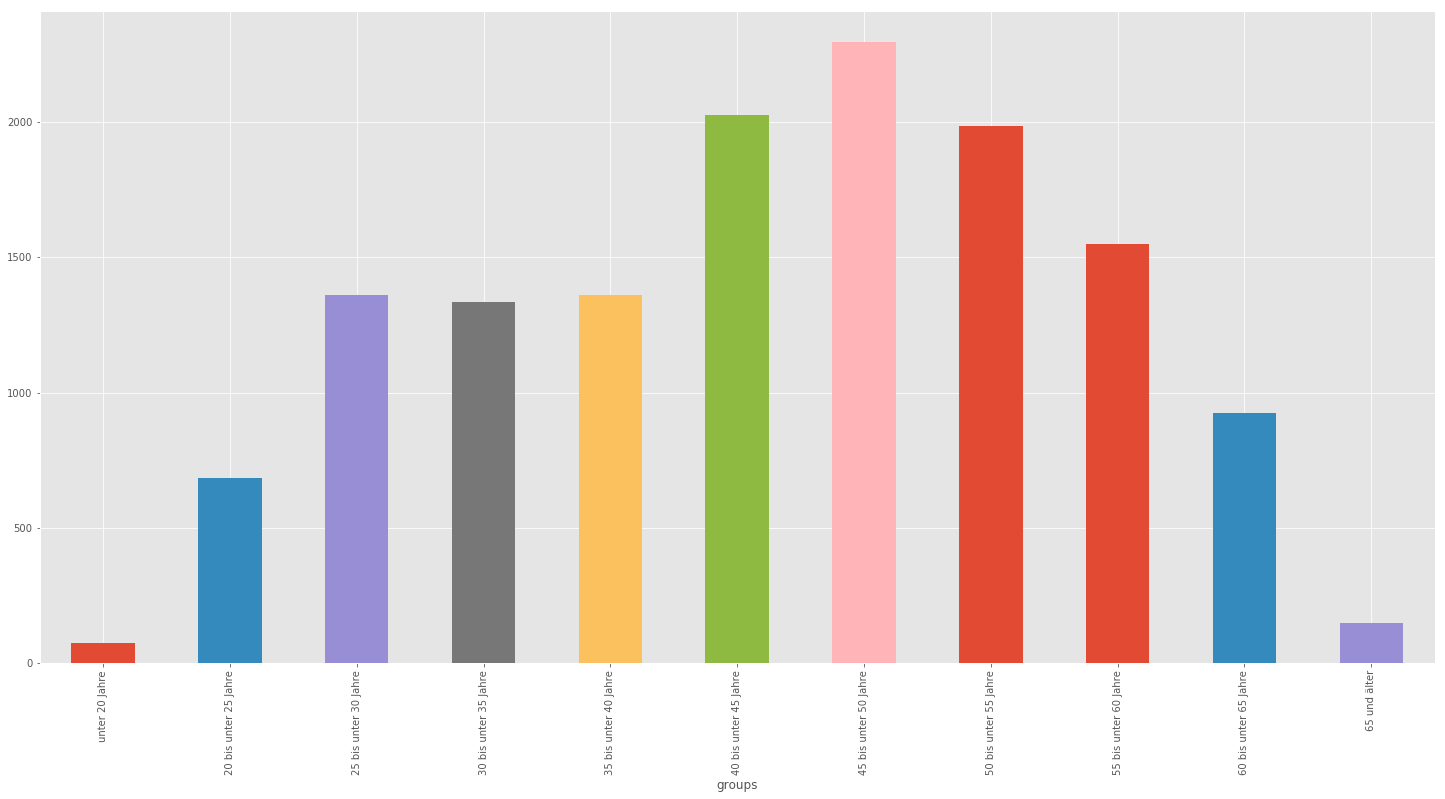

In [61]:
df_pdf_tbl1.set_index('groups')['insgesamt'].plot(kind='bar')

### PDF with Income Data Statistics

In [62]:
# load and parse PDF
df = tabula.read_pdf(url_people_income, encoding = 'cp1252')

# identify row index
TBL_START_ROW = 6
TBL_LAST_ROW = 20
index = [x for x in range(TBL_START_ROW, TBL_LAST_ROW)]
print(index)
df_pdf = df.iloc[index,:]

# rename columns
df_pdf.columns = ['col_{0}'.format(x+1) for x in range(len(df_pdf.columns))]
df_pdf = df_pdf.reset_index()

[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [63]:
df_pdf

,index,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8
0,6,S 1,S 2,S 3,S 4,S 5,S 6,S 7,S 8
1,7,gesamt,80.766,2.616.202,2.580.273,2.185.024,425.346,2.159.513,333.834
2,8,0 -5.000 €,14.796,23.187,21.991,17.576,376,35.920,627
3,9,5.000 -10.000 €,6.953,53.758,52.268,42.285,830,51.199,1.465
4,10,10.000 -15.000 €,7.138,91.794,89.126,70.767,2.972,77.683,3.812
5,11,15.000 -20.000 €,7.094,127.054,124.068,100.667,7.767,113.776,8.414
6,12,20.000 -25.000 €,7.274,166.402,163.607,134.926,14.304,155.551,14.937
7,13,25.000 -30.000 €,7.212,200.407,197.992,164.841,20.711,192.722,21.542
8,14,30.000 -35.000 €,6.103,200.223,197.777,167.066,24.177,193.226,25.065
9,15,35.000 -50.000 €,11.394,479.895,474.055,402.969,68.929,460.620,69.982


In [64]:
def custom_replace(df, column):
    df[column] = df[column].astype(str)   # <- to let conversion to srt happen
    df[column] = df[column].apply(lambda x: x.replace('NaN', '0'))
    df[column] = df[column].apply(lambda x: x.replace('-', '0'))
    df[column] = df[column].apply(lambda x: x.replace('•', '0'))
    df[column] = df[column].apply(lambda x: x.replace('.', ''))
    #df[column] = df[column].apply(lambda x: x.replace(',', '.'))
    df[column] = df[column].astype(float) # <- to let conversion happen once

# remove top columns
df_income = df_pdf.drop([0,1])
df_income = df_income.reset_index()
df_income = df_income.drop(columns = ['level_0'])

# conver columns into float
df_columns = ['col_2','col_3','col_4','col_5','col_6','col_7','col_8']
for col in df_columns:
    custom_replace(df_income, col)
    #df_income[col] = df_income[col].astype(float)

df_income

,index,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8
0,8,0 -5.000 €,14796.0,23187.0,21991.0,17576.0,376.0,35920.0,627.0
1,9,5.000 -10.000 €,6953.0,53758.0,52268.0,42285.0,830.0,51199.0,1465.0
2,10,10.000 -15.000 €,7138.0,91794.0,89126.0,70767.0,2972.0,77683.0,3812.0
3,11,15.000 -20.000 €,7094.0,127054.0,124068.0,100667.0,7767.0,113776.0,8414.0
4,12,20.000 -25.000 €,7274.0,166402.0,163607.0,134926.0,14304.0,155551.0,14937.0
5,13,25.000 -30.000 €,7212.0,200407.0,197992.0,164841.0,20711.0,192722.0,21542.0
6,14,30.000 -35.000 €,6103.0,200223.0,197777.0,167066.0,24177.0,193226.0,25065.0
7,15,35.000 -50.000 €,11394.0,479895.0,474055.0,402969.0,68929.0,460620.0,69982.0
8,16,50.000 - 125.000 €,11118.0,802412.0,794493.0,669522.0,150863.0,713004.0,138354.0
9,17,125.000 - 250.000 €,1232.0,208017.0,205094.0,175480.0,56323.0,109054.0,30465.0


#### Basic Plots

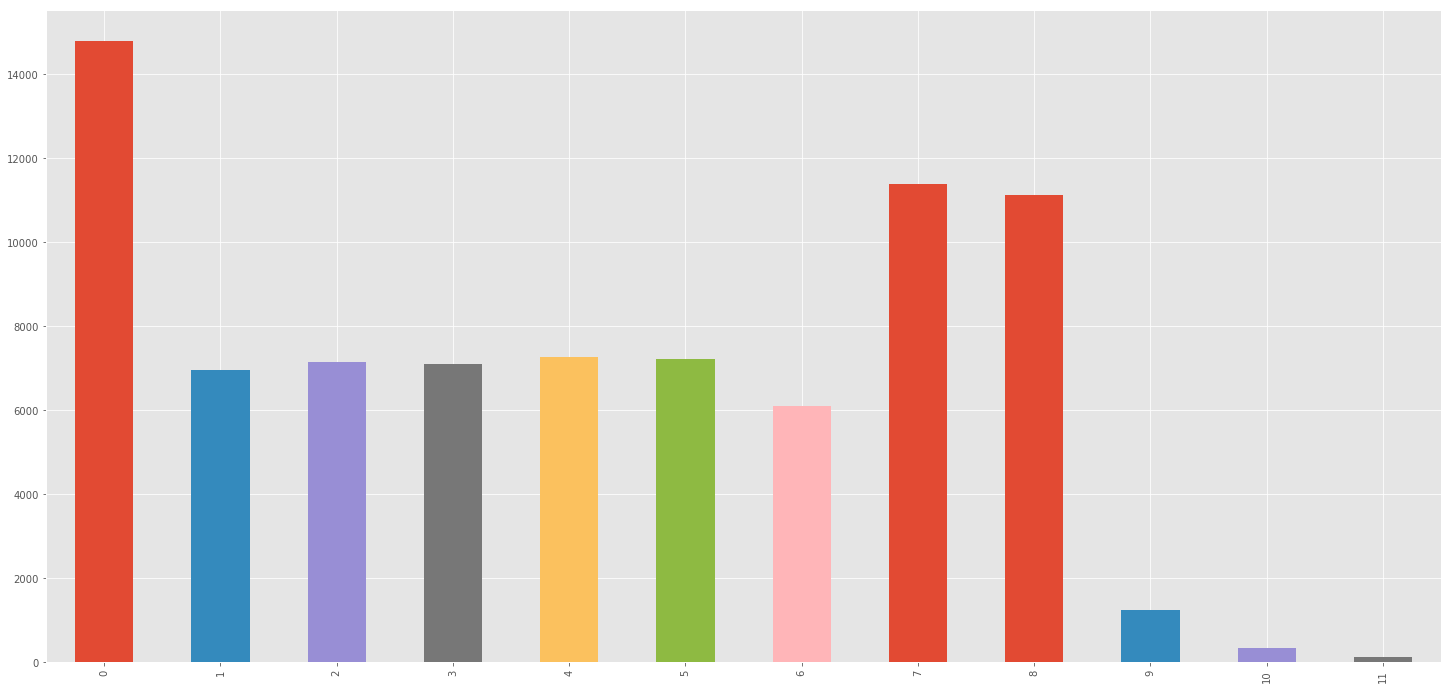

In [65]:
df_income['col_2'].plot(kind='bar') # not manipulated

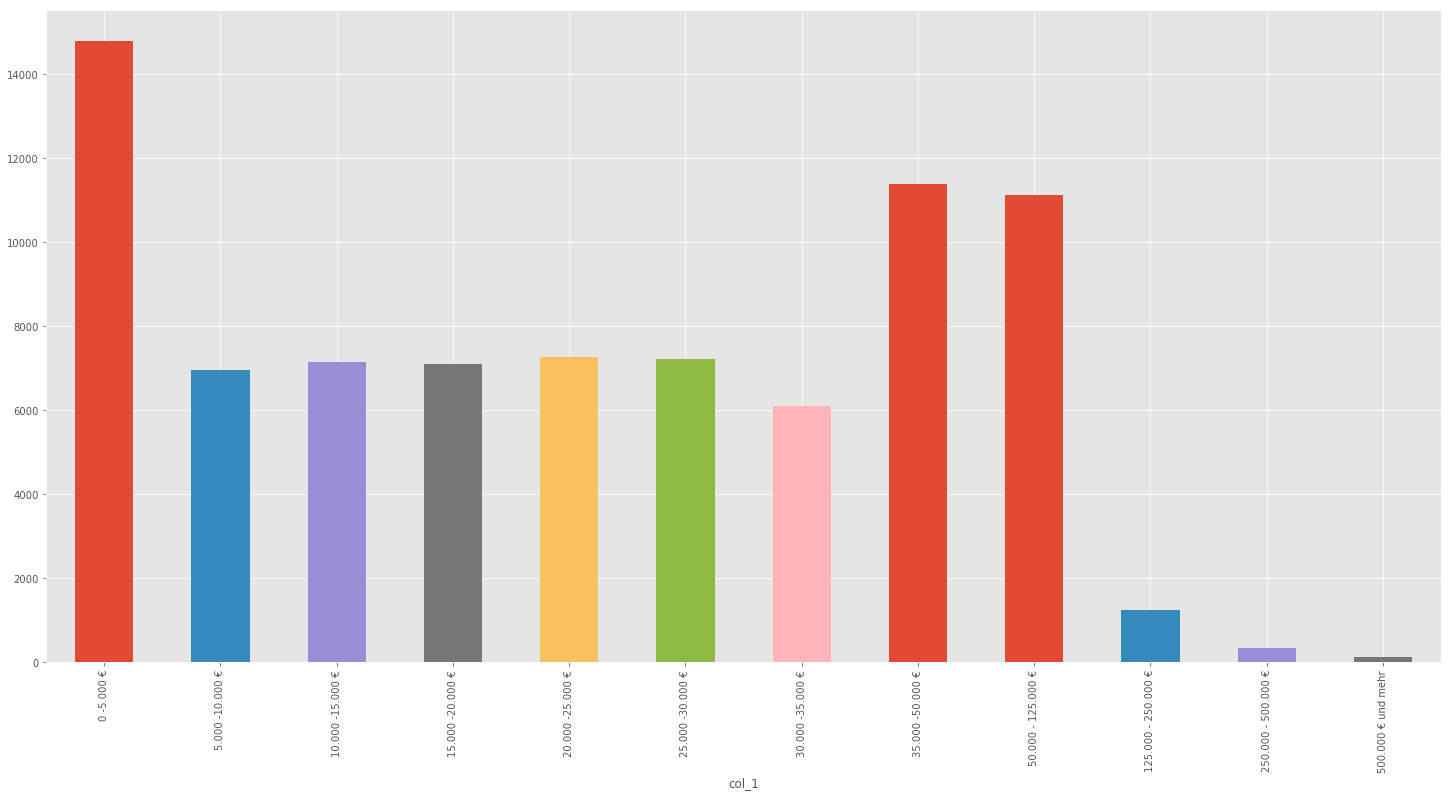

In [66]:
df_income.set_index('col_1')['col_2'].plot(kind='bar') # set_index to manipulate x-axis